# Import and clean nulls

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

raw_data = pd.read_csv('data\kc_house_data.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [2]:
df = raw_data.copy()
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)
df['waterfront'].fillna('NO', inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Investigating each feature

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 'id'

Dropping the 'id' column, this is a unique identifier that we will not be using in any analysis/modeling.

In [5]:
df.drop(['id'], axis=1, inplace=True)

## 'date'

First we will convert the column to a datetime object

In [6]:
df.date = pd.to_datetime(df.date)

In [25]:
df.date.describe(datetime_is_numeric=True)

count                            21597
mean     2014-10-29 04:20:38.171968512
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object

The sale dates range from 5/2/2014 to 5/27/2015.

Having this feature as a datetime object will allow for additional feature engineering later on.

## 'price'

In [26]:
df.price.describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

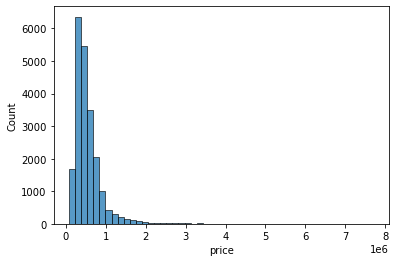

In [66]:
sns.histplot(data=df, x='price', bins=50);

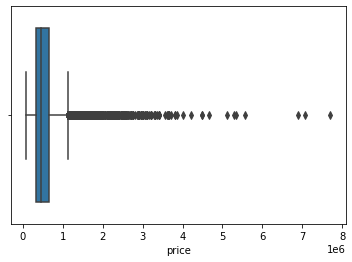

In [65]:
sns.boxplot(data=df, x='price');

The price data is heavily right skewed. Our average home price is \\$540k, it looks like lots of homes sell for under \\$100k. But there are enough homes that sell for over \\$500k to push the average up.

> We may need to consider scaling and normalizing later?

## 'bedrooms'

In [29]:
df.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

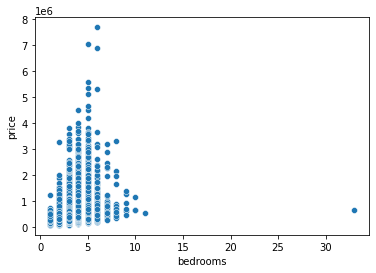

In [31]:
sns.scatterplot(data=df, x='bedrooms', y='price')

In [32]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

The vast majority of homes are 5 bedrooms and under. We have one outlier, some mansion that has 33 rooms, that we may consider removing later on. We will leave the feature alone for now but investigate how to adjust it for modeling later.

## 'bathrooms'

In [33]:
df.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

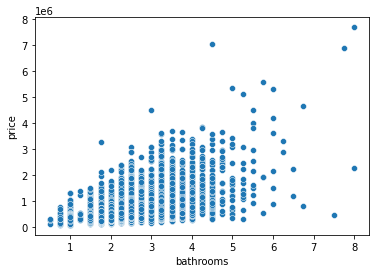

In [35]:
sns.scatterplot(data=df, x='bathrooms', y='price');

In [42]:
bathroom_values = df.bathrooms.index

In [47]:
df.bathrooms.value_counts(ascending=False)

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

This was very unexpected. 

After some research, learned that a bathroom is considered 'full' with 4 parts, each worth a quarter:
- sink
- toilet
- shower
- bathtub

For now we will leave the column alone, but it may be worthwhile to look at binning this feature. What we cannot account for is what type of bathroom combination makes up the value for the home.

## 'sqft_living'

In [49]:
df.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

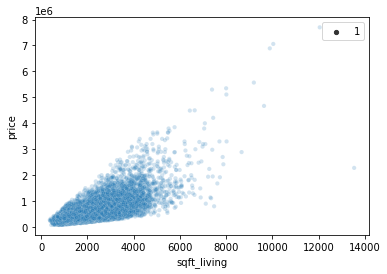

In [63]:
sns.scatterplot(data=df, x='sqft_living', y='price', size=1, alpha=0.2);

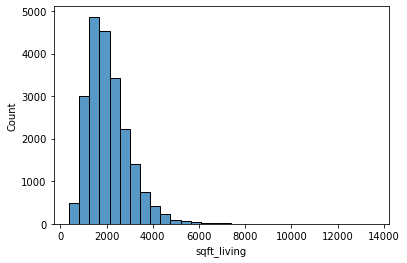

In [58]:
sns.histplot(data=df, x='sqft_living', bins=30);

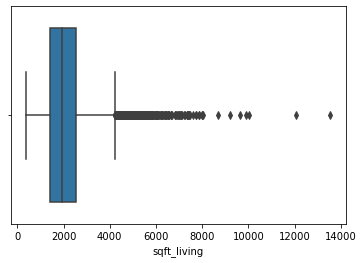

In [67]:
sns.boxplot(data=df, x='sqft_living');

In [96]:
len(df[df.sqft_living <= 4000])/len(df)

0.9637912673056444

57% of homes are have below the average of 2,080 ft$^{2}$.

96% of home have below 4,000 ft$^{2}$.

The vast majority of our sqft_living data is grouped under 4,000 ft$^{2}$. There are some large homes out there, but our mean and median are pretty close (2,080 vs 1,910). The data looks normal except for the right skewedness.


Again, suspect that we have a handful of mansions in our dataset. Initial modeling we will leave them in, but we may consider removing those larger homes as they may affect the model.

## 'sqft_lot'

In [75]:
df.sqft_lot.describe().round()

count      21597.0
mean       15099.0
std        41413.0
min          520.0
25%         5040.0
50%         7618.0
75%        10685.0
max      1651359.0
Name: sqft_lot, dtype: float64

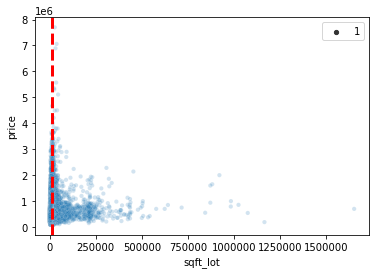

In [83]:
sns.scatterplot(data=df, x='sqft_lot', y='price', size=1, alpha=0.2)

plt.axvline(x=df.sqft_lot.mean(), color='red', ls='--', lw=3)

plt.ticklabel_format(style='plain', axis='x',useOffset=False);

Three quarters of our data on sqft_lot is under 10,000 ft$^{2}$, the average lot is only about 15,000 ft$^{2}$.

The large lot sizes are enormously large in comparison, and that may be fouling up our model later. This is another feature we may need to scale/normalize later on.

In [85]:
# sqft is easy to estimate for inside home size, but more difficult to get a
# sense for. If we later want to conver to acres, divide sqft by 43560
15099 / 43560

# our average lot size is 15,099 sqft, which is .35 acres

0.3466253443526171

In [95]:
len(df[df.sqft_lot < 15099])/len(df)

0.8519238783164328

85% of homes have a lot less than the average of 15,099 sqft. 

For now we are leaving everything in the baseline model, but this is a feature where we may want to cut out higher lots to more accurately predict the average home in King County.

## 'floors'

In [97]:
df.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

<AxesSubplot:xlabel='floors', ylabel='Count'>

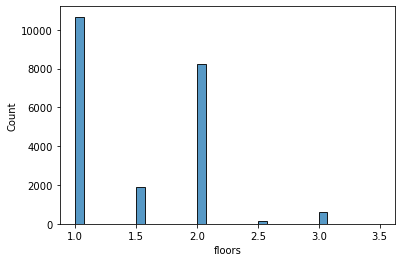

In [98]:
sns.histplot(data=df, x='floors')

A 1.5-storey house is a detached home that has a second floor that is about half the size of the main floor, but is off to one side.

Most of our data is 1 or 2 floor homes, but we have some 1.5, 2.5, 3 and 3.5 in there too.

This feature may experience multicollinearity with sqft_living, so we will check for that before a baseline model.

## 'waterfront'

In [100]:
df.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

This is a simple categorical, if the home is considered waterfront or not. We will have to convert this to a boolean feature to include it.

## 'view'

In [102]:
df.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [103]:
len(df[df.view == 'NONE'])/len(df)

0.9022086400889012

This is another categorical feature of the home.

One option is onehotencoding this feature later, but 90% of this feature is 'NONE' so we may instead convert this to a boolean feature

## 'condition'

Documentation with the dataset explains this feature is the overall condition of the home relative to ongoing maintenance.

In [104]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

# Log scaling 'price' feature

<AxesSubplot:xlabel='price', ylabel='Count'>

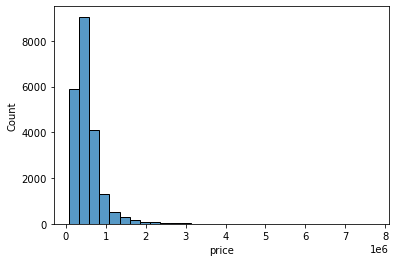

In [8]:
log_price = np.log(df.price)

In [9]:
log_price

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price, Length: 21597, dtype: float64

In [10]:
df_log = pd.DataFrame([])

In [11]:
df_log['log_price'] = np.log(df.price)

In [12]:
df_log

,log_price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166
...,...
21592,12.793859
21593,12.899220
21594,12.904459
21595,12.899220


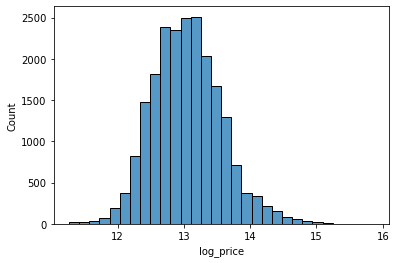

In [13]:
sns.histplot(data=df_log, x='log_price', bins=30);

In [14]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_final = df_log.apply(normalize)

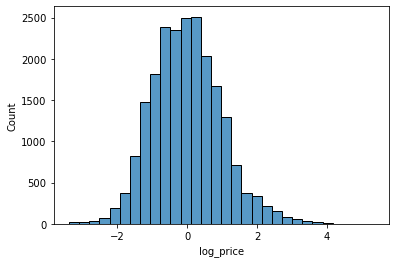

In [15]:
sns.histplot(data=df_final, x='log_price', bins=30);

Results from correlated numerical data, focus on exploring how to transform/normalize these 4 (and price)

- sqft_living    0.701917
- bathrooms      0.525906
- bedrooms       0.308787
- floors         0.256804

In [16]:
df.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64